# A simple Neural Network that uses 2 features to predict Price of an Object

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/fake_reg.csv')

In [3]:
df.head()

price     feature1     feature2
0  461.527929   999.787558   999.766096
1  548.130011   998.861615  1001.042403
2  410.297162  1000.070267   998.844015
3  540.382220   999.952251  1000.440940
4  546.024553  1000.446011  1000.338531

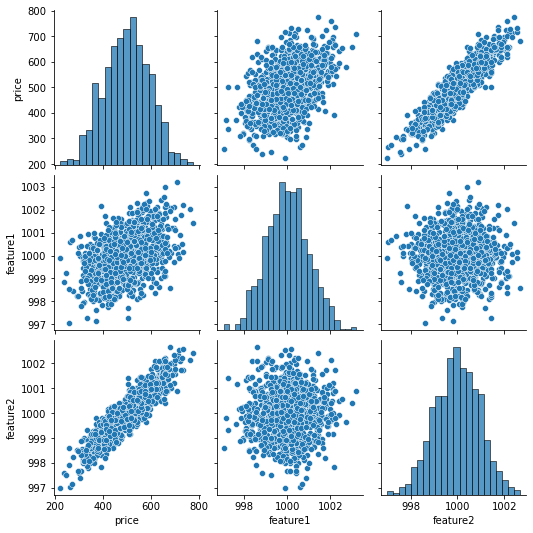

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
#by convention tesorflow uses numpy arrays instead of pandas dataframes. By adding .values we can extract the array 

X = df[['feature1','feature2']].values
y = df['price'].values 

In [7]:
print(X)

[[ 999.78755752  999.7660962 ]
 [ 998.86161491 1001.04240315]
 [1000.07026691  998.84401463]
 ...
 [1001.45164617  998.84760554]
 [1000.77102275  998.56285086]
 [ 999.2322436  1001.45140713]]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
#to work in a neural network, we need to scale our data and normalize it

from sklearn.preprocessing import MinMaxScaler

In [10]:
#help(MinMaxScaler)

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(X_train)

MinMaxScaler()

In [13]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train

#note that all values are now between 0 and 1

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [15]:
# Creating the neural network

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
#help(Sequential)

In [20]:
#help(Dense)

In [23]:
model = Sequential([Dense(4,activation = 'relu'),Dense(2,activation = 'relu'),Dense(1,activation = 'sigmoid')])         
#creating a dense neural network with 3 layers and relu and sigmoid functions

In [29]:
#we can also do it this way which is normally preferred as we can easily add and remove layers

model = Sequential()

model.add(Dense(4,activation = 'relu'))
model.add(Dense(4,activation = 'relu'))
model.add(Dense(4,activation = 'relu'))
model.add(Dense(1))                       #output layer

model.compile(optimizer = 'rmsprop', loss = 'mse')        

'''
optimizer lets you choose method for gradient descent(eg. adam)
loss parameter depends on the type of problem: check notebook for details. Since the problem at hand is a regression 
problem(aswe are predicting numerical values). We use the mean square error loss.
'''

'\noptimizer lets you choose method for gradient descent(eg. adam)\nloss parameter depends on the type of problem: check notebook for details. Since the problem at hand is a regression \nproblem(aswe are predicting numerical values). We use the mean square error loss.\n'

In [30]:
#model training

model.fit(x = X_train, y = y_train, epochs = 250)        #epochs = no. of times the model go through the entire dataset

Epoch 1/250
22/22 [==============================] - 1s 1ms/step - loss: 257178.4620
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 258988.8920
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 253564.4443
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 257025.4959
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 253674.4368
Epoch 6/250
22/22 [==============================] - 0s 881us/step - loss: 258464.7208
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 258631.7072
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 257076.8709
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 254357.8764
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 256750.6596
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 255565.3668
Epoch 12/250
22/22 [==============================] - 0s 1ms/

22/22 [==============================] - 0s 1ms/step - loss: 2388.8982
Epoch 98/250
22/22 [==============================] - 0s 1ms/step - loss: 2193.4978
Epoch 99/250
22/22 [==============================] - 0s 1ms/step - loss: 2026.7729
Epoch 100/250
22/22 [==============================] - 0s 1ms/step - loss: 1988.9805
Epoch 101/250
22/22 [==============================] - 0s 1ms/step - loss: 2159.0142
Epoch 102/250
22/22 [==============================] - ETA: 0s - loss: 2500.80 - 0s 1ms/step - loss: 2187.7965
Epoch 103/250
22/22 [==============================] - 0s 1ms/step - loss: 2264.8265
Epoch 104/250
22/22 [==============================] - 0s 1ms/step - loss: 2140.1967
Epoch 105/250
22/22 [==============================] - 0s 1ms/step - loss: 1900.0289
Epoch 106/250
22/22 [==============================] - 0s 1ms/step - loss: 1859.2826
Epoch 107/250
22/22 [==============================] - 0s 1ms/step - loss: 1781.3579
Epoch 108/250
22/22 [==============================] - 

In [31]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

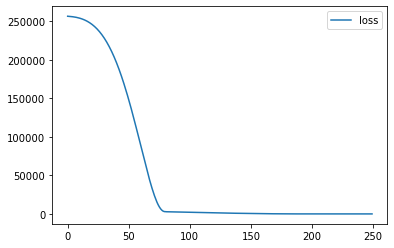

In [32]:
loss_df.plot()

In [33]:
#Model Evaluation

In [34]:
model.evaluate(X_test,y_test,verbose = 0)

25.000606536865234

In [35]:
model.evaluate(X_train,y_train,verbose = 0)

23.76168441772461

In [36]:
predictions = model.predict(X_test)

In [38]:
predictions

array([[405.38275],
       [623.7394 ],
       [592.31714],
       [572.3988 ],
       [366.68658],
       [579.3568 ],
       [515.19543],
       [459.22864],
       [549.4066 ],
       [447.6355 ],
       [611.98   ],
       [549.11316],
       [419.19943],
       [408.96362],
       [651.45953],
       [437.40924],
       [508.5993 ],
       [660.1459 ],
       [662.80115],
       [565.7107 ],
       [334.28387],
       [444.9461 ],
       [382.60687],
       [378.83533],
       [566.767  ],
       [610.7838 ],
       [532.5456 ],
       [427.9649 ],
       [655.6576 ],
       [414.1806 ],
       [442.74927],
       [485.26025],
       [438.52414],
       [682.0751 ],
       [424.86334],
       [417.7838 ],
       [502.0724 ],
       [550.64014],
       [509.87476],
       [395.44168],
       [618.7899 ],
       [416.72842],
       [604.641  ],
       [446.0761 ],
       [502.1297 ],
       [581.9001 ],
       [669.22687],
       [490.5395 ],
       [318.6317 ],
       [485.5595 ],


In [39]:
predictions = pd.Series(predictions.reshape(300,))

In [40]:
predictions_df = pd.DataFrame(y_test,columns = ['Test True Y'])
predictions_df = pd.concat([predictions_df,predictions], axis = 1)

In [41]:
predictions_df.head()

Test True Y           0
0   402.296319  405.382751
1   624.156198  623.739380
2   582.455066  592.317139
3   578.588606  572.398804
4   371.224104  366.686584

In [42]:
predictions_df.columns = ['Test True Y','Model Predictions']

In [43]:
predictions_df.head()

Test True Y  Model Predictions
0   402.296319         405.382751
1   624.156198         623.739380
2   582.455066         592.317139
3   578.588606         572.398804
4   371.224104         366.686584

<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

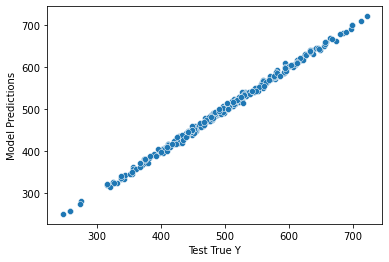

In [44]:
sns.scatterplot(x = 'Test True Y', y = 'Model Predictions', data = predictions_df)

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [48]:
mean_absolute_error(predictions_df['Test True Y'],predictions_df['Model Predictions'])

#this is the actual value by which you are off on average

4.005454197572378

In [49]:
mean_squared_error(predictions_df['Test True Y'],predictions_df['Model Predictions'])

25.00058413140459

In [50]:
#predicting from brand new data

In [65]:
new_datapoint = [[995,1001]]               #new datapoint with new features

In [66]:
#since our model is trained on the scaled version of the features

new_datapoint = scaler.transform(new_datapoint)

In [67]:
model.predict(new_datapoint)

array([[388.29724]], dtype=float32)

In [69]:
#saving your model

In [68]:
from tensorflow.keras.models import load_model

In [70]:
model.save('my_first_model.h5')

In [71]:
#This is how you load the saved model for future use

In [72]:
reusing_model = load_model('my_first_model.h5')